# Multinomial Naive Bayes
- Naive Bayes classifier for multinomial models

The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

In [2]:
from sklearn.datasets import fetch_20newsgroups

In [3]:
data = fetch_20newsgroups()

In [4]:
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [5]:
categories = ['rec.sport.baseball', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [6]:
print(len(train.data), len(test.data))

2373 1578


In [7]:
np.unique(train.target)

array([0, 1, 2, 3])

In [8]:
train.target_names

['comp.graphics', 'rec.sport.baseball', 'sci.space', 'soc.religion.christian']

In [9]:
print(train.data[0])

From: jpopovich@guvax.acc.georgetown.edu
Subject: Re: New Uniforms
Distribution: world
Organization: Georgetown University
Lines: 10

While I enjoy the trend towards the more classic style of uniform - 
and I disagree with the person who wants a return to the non-gray road 
uniforms - it should be remembered that one of the, if not THE reason 
for the redesigning of uniforms, especially hats (re: the new road all 
green A's caps and the cardinal navy blue road cap), is the marketing 
money to be made in sales of new merchandise. 

Jeffrey Popovich
jpopovich@guvax.georgetown.edu
 



In [10]:
print(test.data[0])

From: henry@zoo.toronto.edu (Henry Spencer)
Subject: Re: Vandalizing the sky.
Organization: U of Toronto Zoology
Lines: 12

In article <1993Apr27.185721.15511@cs.ucf.edu> clarke@acme.ucf.edu (Thomas Clarke) writes:
>Now, if they wanted to paint the CocaCola symbol on the
>moon in lampblack, that would give me pause...

Wouldn't bother me.  I'd laugh.  It wouldn't work -- the surface of the
Moon is *already* pretty dark, and the contrast would be so poor you
couldn't possibly see it.  The only reason the Moon looks bright is that
it's in bright sunlight against an otherwise-dark sky.  Evidently Heinlein
didn't know that...
-- 
SVR4 resembles a high-speed collision   | Henry Spencer @ U of Toronto Zoology
between SVR3 and SunOS.    - Dick Dunn  |  henry@zoo.toronto.edu  utzoo!henry



In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [12]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [13]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

In [14]:
labels[0:10]

array([2, 3, 0, 1, 1, 3, 1, 1, 1, 0])

In [15]:
from sklearn.metrics import confusion_matrix

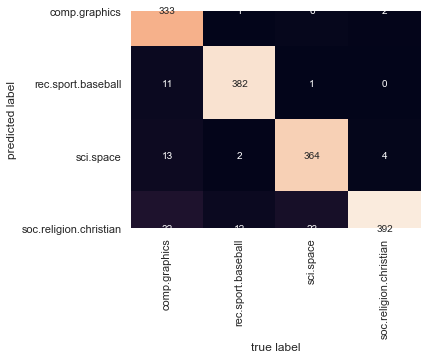

In [16]:
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [17]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    print(model.predict_proba([s]))
    return train.target_names[pred[0]]

In [18]:
predict_category('hinduism')

[[0.22312378 0.22411829 0.22033385 0.33242408]]


'soc.religion.christian'

In [19]:
predict_category('sending a payload to the ISS')

[[0.18982    0.1745612  0.40062472 0.23499408]]


'sci.space'

In [20]:
predict_category('discussing religion vs atheism')

[[0.18865105 0.20381571 0.10705725 0.50047599]]


'soc.religion.christian'

In [21]:
predict_category('determining the screen resolution')

[[0.55980495 0.1358614  0.15878494 0.14554872]]


'comp.graphics'

In [22]:
predict_category('to tell the machine to cook')

[[0.23598766 0.20738864 0.35542769 0.201196  ]]


'sci.space'

In [23]:
predict_category('to tell the machine to talk')

[[0.22079934 0.27573562 0.21014236 0.29332268]]


'soc.religion.christian'

In [24]:
predict_category('to tell the machine to walk')

[[0.28267893 0.28336391 0.18821845 0.2457387 ]]


'rec.sport.baseball'